In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv(r"C:\Users\lasya\OneDrive\Desktop\DS PROJECT\ds project 3\car_dataset.csv")

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
df.shape

(4340, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [13]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [15]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [16]:
# Step 1: Calculate years of usage 
df['years_diff'] = 2025 - df['year']

# Step 2: Estimate original price (reversing depreciation)
df['original_price'] = df['selling_price'] * (1 / (0.85 ** df['years_diff']))

# Step 3: (Optional) Estimate present price again using depreciation
df['present_price_estimate'] = df['original_price'] * (0.85 ** df['years_diff'])

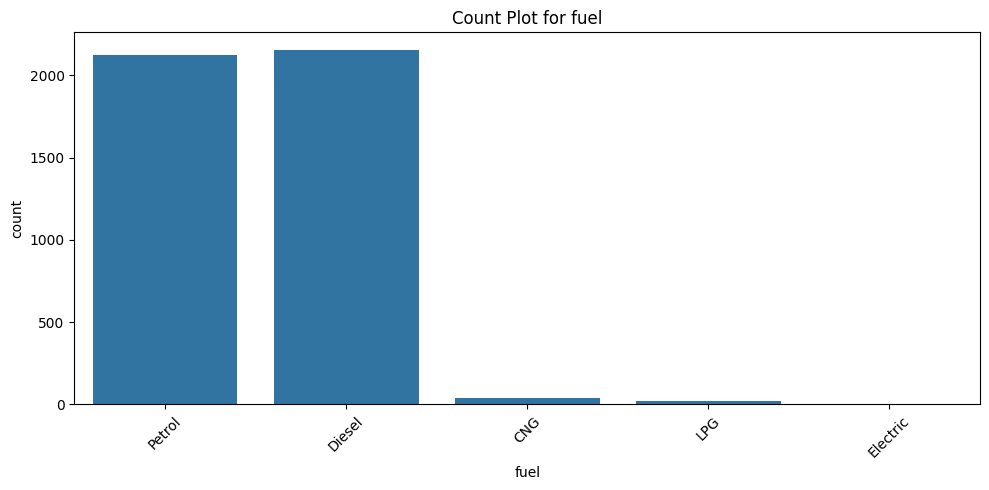

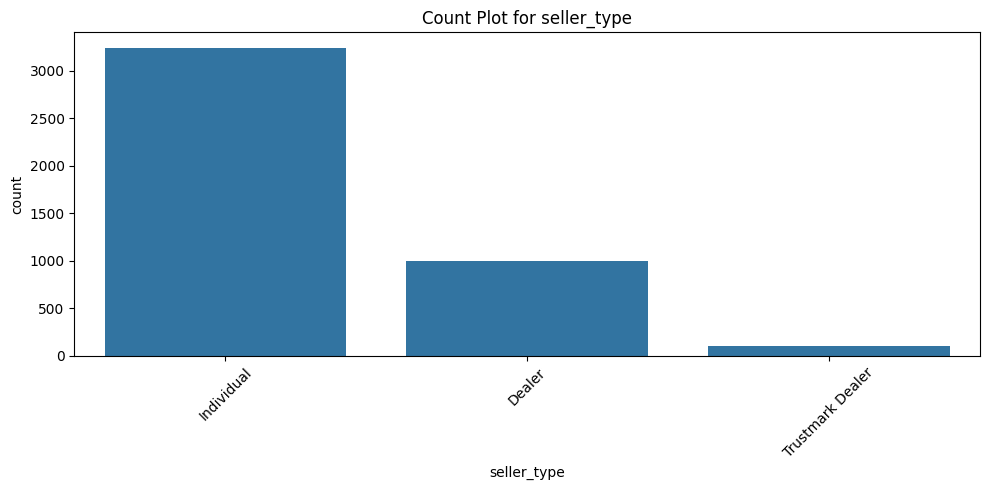

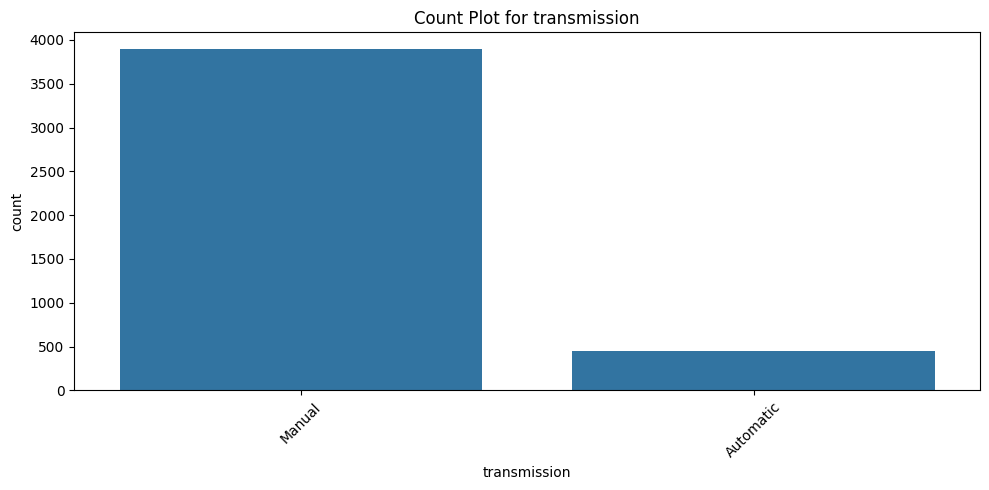

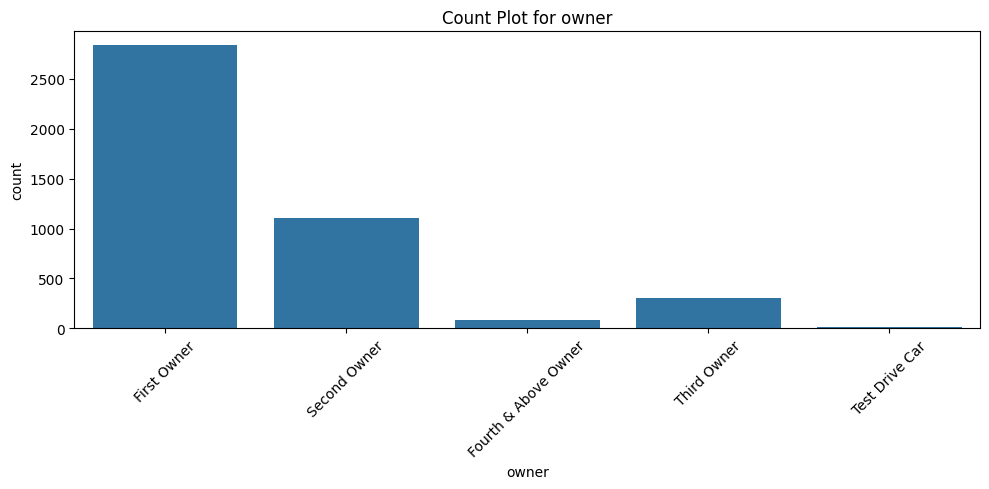

In [17]:

categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

for i in range(len(categorical_cols)):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=categorical_cols[i], data=df)
    plt.title(f'Count Plot for {categorical_cols[i]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


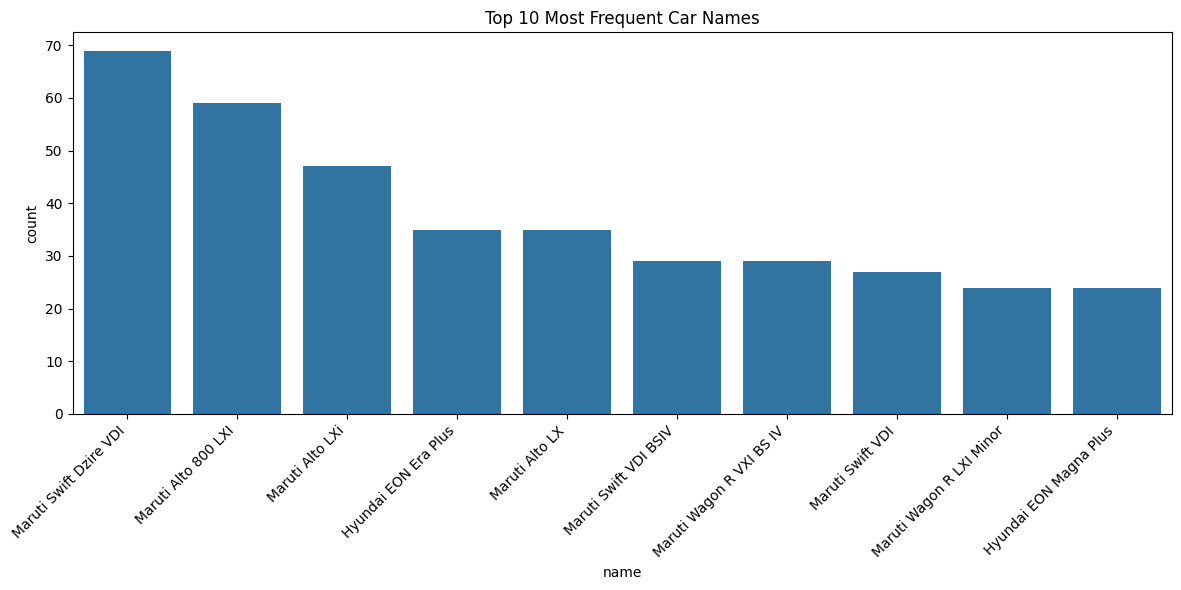

In [18]:
# Get top 10 car names by frequency
top_names = df['name'].value_counts().nlargest(10).index

# Filter DataFrame to include only those top names
filtered_df = df[df['name'].isin(top_names)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='name', data=filtered_df, order=top_names)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Frequent Car Names")
plt.tight_layout()
plt.show()


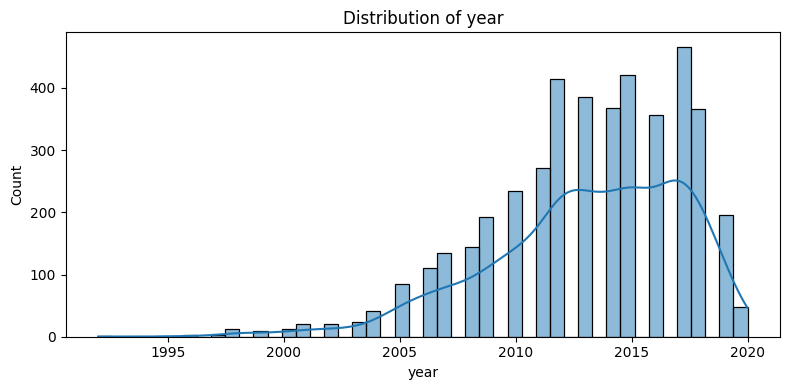

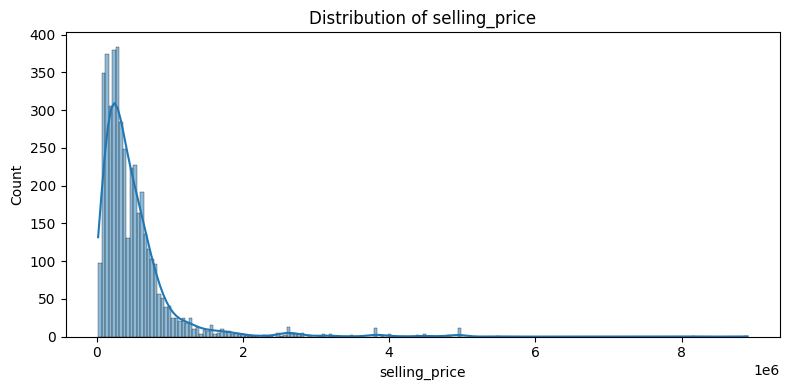

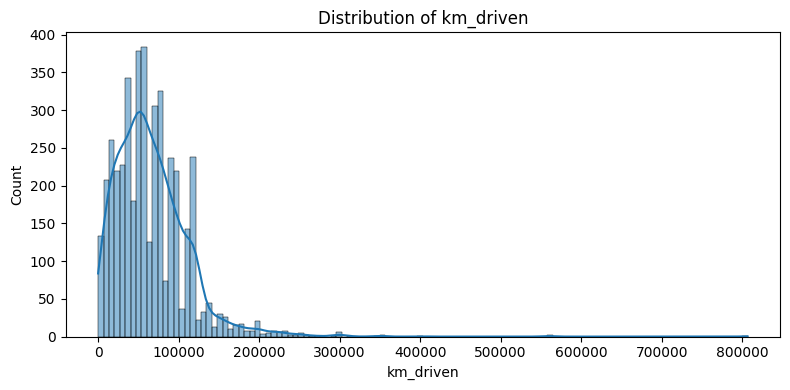

In [19]:
numerical_cols =  ['year', 'selling_price', 'km_driven']

for i in range(len(numerical_cols)):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[numerical_cols[i]], kde=True)
    plt.title(f'Distribution of {numerical_cols[i]}')
    plt.tight_layout()
    plt.show()


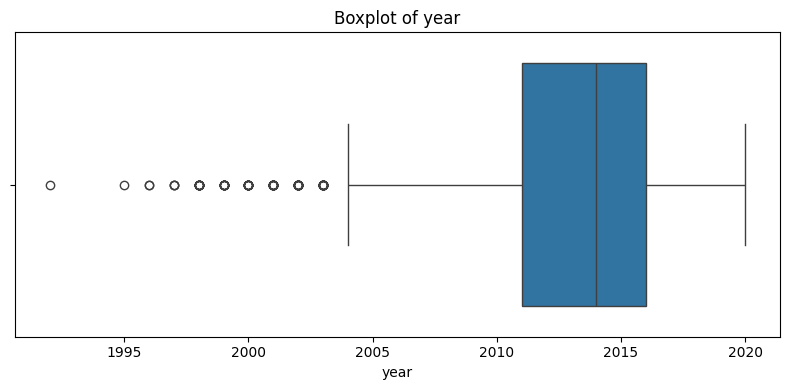

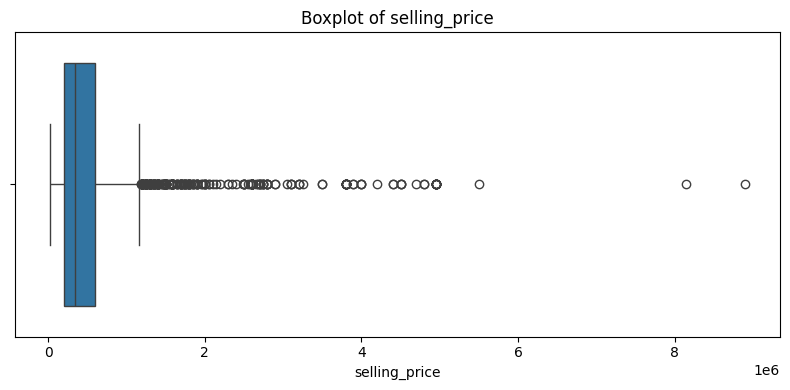

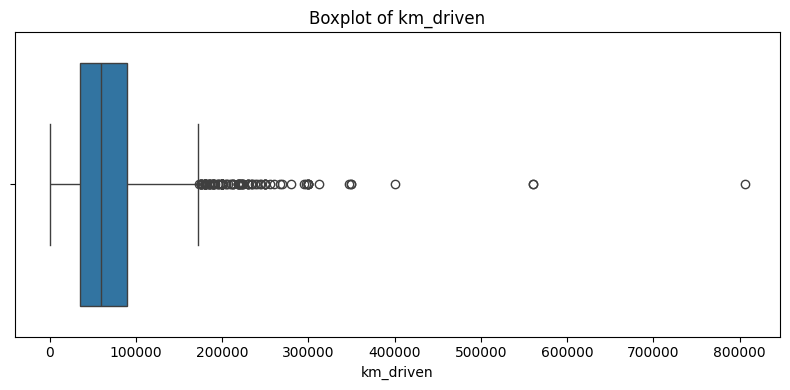

In [20]:
numerical_cols = ['year', 'selling_price', 'km_driven']

for i in range(len(numerical_cols)):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[numerical_cols[i]])
    plt.title(f'Boxplot of {numerical_cols[i]}')
    plt.tight_layout()
    plt.show()


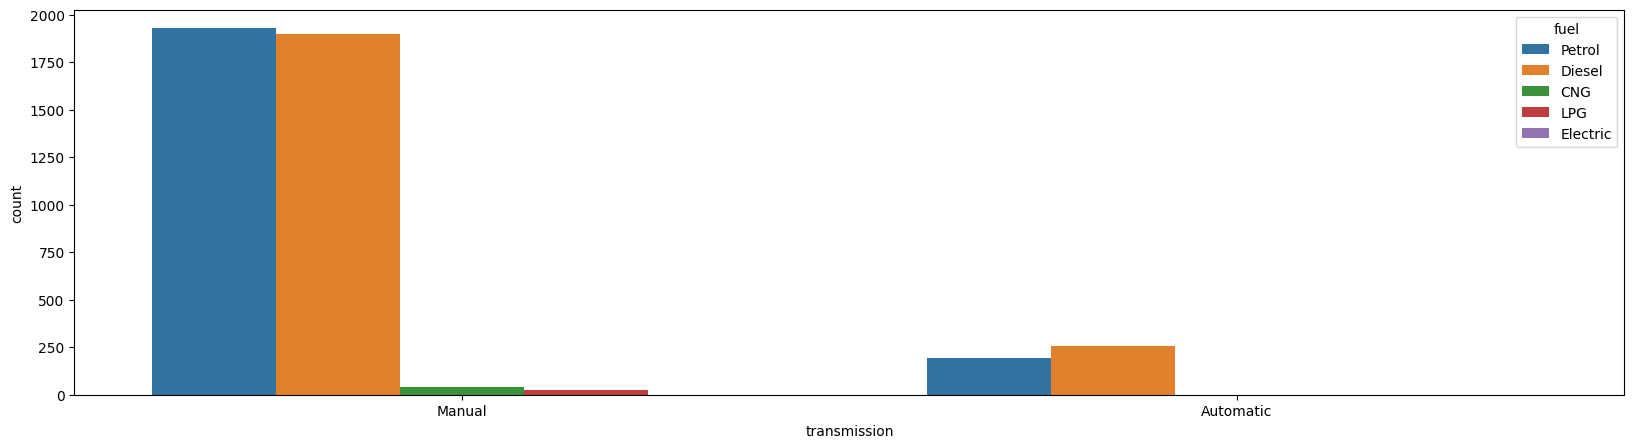

In [21]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x='transmission', data=df, hue='fuel')
plt.show()

In [22]:
df['years_diff'] = 2025 - df['year']
df['Present_Price'] = df['selling_price'] * (1 / (0.85 ** df['years_diff']))




In [23]:
df[df['Present_Price']>df['Present_Price'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_diff,original_price,present_price_estimate,Present_Price
44,Audi Q7 35 TDI Quattro Premium,2009,1250000,78000,Diesel,Dealer,Automatic,Third Owner,16,1.683477e+07,1250000.0,1.683477e+07
61,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner,29,2.784782e+07,250000.0,2.784782e+07
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner,8,2.990930e+07,8150000.0,2.990930e+07
96,Audi A8 4.2 TDI,2013,2800000,49000,Diesel,Dealer,Automatic,First Owner,12,1.968480e+07,2800000.0,1.968480e+07
105,BMW 7 Series 730Ld,2012,2500000,48000,Diesel,Dealer,Automatic,First Owner,13,2.067731e+07,2500000.0,2.067731e+07
163,Jaguar XJ 5.0 L V8 Supercharged,2010,2550000,40000,Petrol,Individual,Automatic,Second Owner,15,2.919149e+07,2550000.0,2.919149e+07
218,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,2013,2000000,15000,Diesel,Individual,Automatic,First Owner,12,1.406057e+07,2000000.0,1.406057e+07
318,BMW 3 Series 320d Sport,2013,2000000,167223,Diesel,Dealer,Automatic,First Owner,12,1.406057e+07,2000000.0,1.406057e+07
536,Jaguar XF 5.0 Litre V8 Petrol,2012,2050000,66363,Petrol,Dealer,Automatic,Second Owner,13,1.695539e+07,2050000.0,1.695539e+07
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner,11,2.629326e+07,4400000.0,2.629326e+07


In [24]:
df[df['selling_price'] > df['selling_price'].quantile(0.99)]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_diff,original_price,present_price_estimate,Present_Price
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner,8,2.990930e+07,8150000.0,2.990930e+07
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner,7,1.403719e+07,4500000.0,1.403719e+07
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner,11,2.629326e+07,4400000.0,2.629326e+07
553,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner,7,1.185362e+07,3800000.0,1.185362e+07
555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner,6,1.312477e+07,4950000.0,1.312477e+07
572,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner,7,1.185362e+07,3800000.0,1.185362e+07
574,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner,6,1.312477e+07,4950000.0,1.312477e+07
591,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner,7,1.185362e+07,3800000.0,1.185362e+07
593,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner,6,1.312477e+07,4950000.0,1.312477e+07
610,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner,7,1.185362e+07,3800000.0,1.185362e+07


In [25]:
df[df['km_driven']>df['km_driven'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_diff,original_price,present_price_estimate,Present_Price
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner,15,3.205340e+06,280000.0,3.205340e+06
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner,14,3.405674e+06,350000.0,3.405674e+06
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner,16,3.097584e+06,229999.0,3.097584e+06
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner,9,2.871120e+06,665000.0,2.871120e+06
1101,Tata Indica DLS,2006,85000,300000,Diesel,Individual,Manual,Second Owner,19,1.864058e+06,85000.0,1.864058e+06
1116,Toyota Innova 2.5 V Diesel 7-seater,2005,200000,223000,Diesel,Individual,Manual,First Owner,20,5.160021e+06,200000.0,5.160021e+06
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner,16,3.366954e+06,250000.0,3.366954e+06
1253,Toyota Corolla Altis D-4D J,2014,715000,234000,Diesel,Individual,Manual,First Owner,11,4.272655e+06,715000.0,4.272655e+06
1414,Skoda Superb Elegance 2.0 TDI CR AT,2011,450000,235000,Diesel,Individual,Automatic,First Owner,14,4.378724e+06,450000.0,4.378724e+06
1426,Mahindra Scorpio VLX AT 2WD BSIII,2004,225000,223660,Diesel,Individual,Automatic,Third Owner,21,6.829440e+06,225000.0,6.829440e+06


<Axes: >

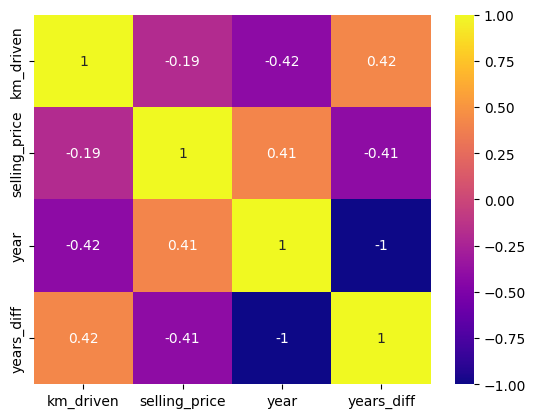

In [26]:
df1 = df[['km_driven', 'selling_price', 'year', 'years_diff']]
sns.heatmap(df1.corr(),annot = True, cmap = 'plasma')

In [27]:
df1.corr()['selling_price']


km_driven       -0.192289
selling_price    1.000000
year             0.413922
years_diff      -0.413922
Name: selling_price, dtype: float64

In [28]:
# Add the new columns to df
df['years_diff'] = 2025 - df['year']
df['Present_Price'] = df['selling_price'] * (1 / (0.85 ** df['years_diff']))

#  Create df1 including 'Present_Price'
df1 = df[['km_driven', 'selling_price', 'year', 'years_diff', 'Present_Price']]

#  Correlation of Present_Price with other features
print(df1.corr()['Present_Price'])


km_driven        0.058225
selling_price    0.623004
year            -0.131786
years_diff       0.131786
Present_Price    1.000000
Name: Present_Price, dtype: float64


In [29]:
df1['present_price_estimate'] = df['present_price_estimate']  # if already created in df

# Now pivot
df1.pivot_table(values='selling_price', index='present_price_estimate', aggfunc='mean')


C:\Users\lasya\AppData\Local\Temp\ipykernel_21124\1744280941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['present_price_estimate'] = df['present_price_estimate']  # if already created in df


,selling_price
present_price_estimate,
20000.0,20000.0
22000.0,22000.0
30000.0,30000.0
35000.0,35000.0
35000.0,35000.0
...,...
4800000.0,4800000.0
4950000.0,4950000.0
5500000.0,5500000.0


In [30]:
df.pivot_table(values='selling_price', index='seller_type', columns='fuel', aggfunc='mean')


fuel,CNG,Diesel,Electric,LPG,Petrol
seller_type,,,,,
Dealer,311444.333333,9.423081e+05,310000.0,240000.000000,475017.552863
Individual,267225.741935,5.616871e+05,NaN,164545.409091,297196.682972
Trustmark Dealer,NaN,1.184583e+06,NaN,NaN,675277.777778


In [31]:
df.pivot_table(
    values='present_price_estimate',
    index='transmission',
    columns='fuel',
    aggfunc='mean'
)


fuel,CNG,Diesel,Electric,LPG,Petrol
transmission,,,,,
Automatic,NaN,1.900102e+06,310000.0,NaN,766409.295337
Manual,277174.925,5.044412e+05,NaN,167826.043478,302683.221762


In [32]:
df.pivot_table(
    values='selling_price', 
    index='transmission', 
    columns='fuel', 
    aggfunc='mean'
)


fuel,CNG,Diesel,Electric,LPG,Petrol
transmission,,,,,
Automatic,NaN,1.900102e+06,310000.0,NaN,766409.295337
Manual,277174.925,5.044412e+05,NaN,167826.043478,302683.221762


In [33]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_diff,original_price,present_price_estimate,Present_Price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18,1.118435e+06,60000.0,1.118435e+06
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18,2.516478e+06,135000.0,2.516478e+06
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13,4.962554e+06,600000.0,4.962554e+06
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8,9.174631e+05,250000.0,9.174631e+05
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11,2.689084e+06,450000.0,2.689084e+06


In [34]:
df2 = df[['year', 'selling_price', 'present_price_estimate', 'km_driven', 'years_diff', 'fuel', 'transmission', 'owner', 'seller_type']]


In [35]:
df2.head()

,year,selling_price,present_price_estimate,km_driven,years_diff,fuel,transmission,owner,seller_type
0,2007,60000,60000.0,70000,18,Petrol,Manual,First Owner,Individual
1,2007,135000,135000.0,50000,18,Petrol,Manual,First Owner,Individual
2,2012,600000,600000.0,100000,13,Diesel,Manual,First Owner,Individual
3,2017,250000,250000.0,46000,8,Petrol,Manual,First Owner,Individual
4,2014,450000,450000.0,141000,11,Diesel,Manual,Second Owner,Individual


In [36]:
df2['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [37]:
df2['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [38]:
df2['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [39]:
df2['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [40]:
df2 = pd.get_dummies(df2,drop_first=True)

In [41]:
df2.head()

,year,selling_price,present_price_estimate,km_driven,years_diff,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer
0,2007,60000,60000.0,70000,18,False,False,False,True,True,False,False,False,False,True,False
1,2007,135000,135000.0,50000,18,False,False,False,True,True,False,False,False,False,True,False
2,2012,600000,600000.0,100000,13,True,False,False,False,True,False,False,False,False,True,False
3,2017,250000,250000.0,46000,8,False,False,False,True,True,False,False,False,False,True,False
4,2014,450000,450000.0,141000,11,True,False,False,False,True,False,True,False,False,True,False


In [42]:
# Mapping False and True with 0 and 1 for the entire dataset
df3 = df2[['fuel_Diesel','fuel_Petrol','transmission_Manual','seller_type_Individual']]
df3 = df3.applymap(lambda x: 1 if x == True else 0)


C:\Users\lasya\AppData\Local\Temp\ipykernel_21124\2912801321.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df3 = df3.applymap(lambda x: 1 if x == True else 0)


In [43]:
df3['fuel_Diesel'].unique()

array([0, 1])

In [44]:
df3.head()

,fuel_Diesel,fuel_Petrol,transmission_Manual,seller_type_Individual
0,0,1,1,1
1,0,1,1,1
2,1,0,1,1
3,0,1,1,1
4,1,0,1,1


In [45]:
df2.drop(['fuel_Diesel', "fuel_Petrol",'transmission_Manual','seller_type_Individual'],axis=1,inplace=True)

In [46]:
#Merge df3 and df2
df2 = pd.concat([df2,df3],axis=1)

In [47]:
df2.head()

,year,selling_price,present_price_estimate,km_driven,years_diff,fuel_Electric,fuel_LPG,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Trustmark Dealer,fuel_Diesel,fuel_Petrol,transmission_Manual,seller_type_Individual
0,2007,60000,60000.0,70000,18,False,False,False,False,False,False,False,0,1,1,1
1,2007,135000,135000.0,50000,18,False,False,False,False,False,False,False,0,1,1,1
2,2012,600000,600000.0,100000,13,False,False,False,False,False,False,False,1,0,1,1
3,2017,250000,250000.0,46000,8,False,False,False,False,False,False,False,0,1,1,1
4,2014,450000,450000.0,141000,11,False,False,False,True,False,False,False,1,0,1,1


In [48]:
y=df2['selling_price']
x=df2.drop('selling_price',axis=1)

In [49]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [50]:
x.head()

,year,present_price_estimate,km_driven,years_diff,fuel_Electric,fuel_LPG,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Trustmark Dealer,fuel_Diesel,fuel_Petrol,transmission_Manual,seller_type_Individual
0,2007,60000.0,70000,18,False,False,False,False,False,False,False,0,1,1,1
1,2007,135000.0,50000,18,False,False,False,False,False,False,False,0,1,1,1
2,2012,600000.0,100000,13,False,False,False,False,False,False,False,1,0,1,1
3,2017,250000.0,46000,8,False,False,False,False,False,False,False,0,1,1,1
4,2014,450000.0,141000,11,False,False,False,True,False,False,False,1,0,1,1


In [51]:
x.shape

(4340, 15)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [65]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (3689, 15)
x_test shape: (651, 15)
y_train shape: (3689,)
y_test shape: (651,)


In [66]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [69]:
all = []

def car_price_pred_model(model, model_name):
  model.fit(X_train,y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  r2_train = r2_score(y_train,y_pred_train)
  r2_test = r2_score(y_test,y_pred_test)
  all.append(r2_train)
  all.append(r2_test)
  cross_val = cross_val_score(model, X_train, y_train, cv=5)
  # Call the .mean() method to get the mean value before rounding
  cv_mean = cross_val.mean()
  all.append(round(cv_mean,2))
  mae_train = mean_absolute_error(y_train,y_pred_train)
  all.append(round(mae_train,2))
  mae_test = mean_absolute_error(y_test,y_pred_test)
  all.append(round(mae_test,2))
  mse_train = mean_squared_error(y_train,y_pred_train)
  all.append(round(mse_train,2))
  mse_test = mean_squared_error(y_test, y_pred_test)
  all.append(round(mse_test,2))
  fig, ax = plt.subplots(1,2,figsize=(10,4))
  ax[0].set_title('Residual plot of training data')
  sns.distplot(y_train-y_pred_train,ax=ax[0])
  ax[0].set_xlabel('y_train-y-pred_train')
  ax[1].set_title('Residual plot of testing data')
  ax[1].scatter(x = y_test, y = y_pred_test)
  ax[1].set_xlabel('y_test')
  ax[1].set_ylabel('y_pred_test')
  plt.show()
  return all

C:\Users\lasya\AppData\Local\Temp\ipykernel_21124\319309580.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred_train,ax=ax[0])


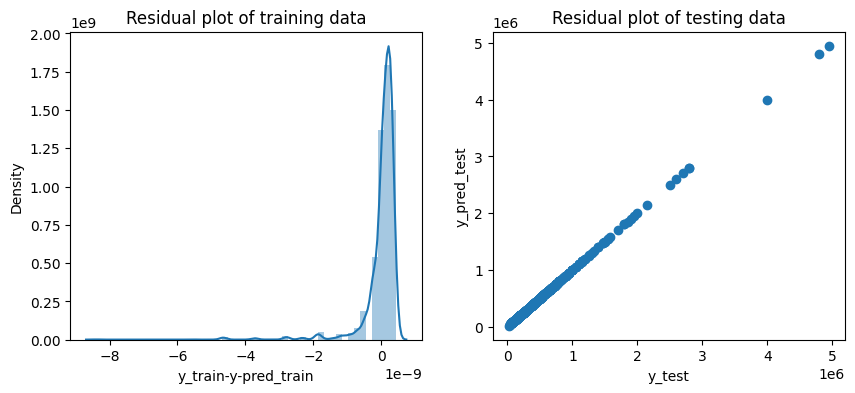

[1.0, 1.0, np.float64(1.0), 0.0, 0.0, 0.0, 0.0]

In [56]:
# starting with standard linear regression
lr = LinearRegression()
car_price_pred_model(lr,'Linear Regression')

In [71]:
# coefficients of the linear model
lr.coef_

array([-4.21515140e-12,  1.00000000e+00, -1.38777878e-17,  4.21515140e-12,
       -1.92364344e-11,  2.46384228e-12, -4.44387130e-12,  1.91462204e-11,
       -1.79930404e-11,  4.66353093e-12,  1.74748203e-11,  1.92694343e-11,
        8.91036802e-12,  1.38924038e-11, -2.40389084e-11])

c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.92735e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.40126e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.57105e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.34801e-17): result may not be accurate.
  return linalg.solve

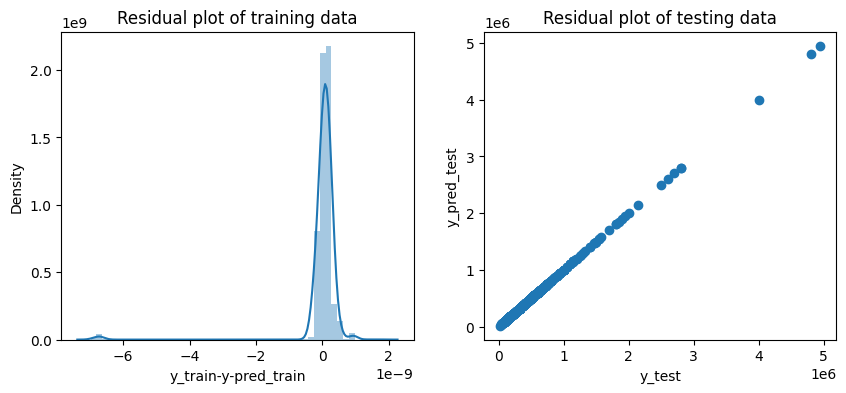

[1.0, 1.0, np.float64(1.0), 0.0, 0.0, 0.0, 0.0]

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3, num =14)
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha = alpha))
car_price_pred_model(rg_rs,"ridge.pkl")


C:\Users\lasya\AppData\Local\Temp\ipykernel_21124\319309580.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred_train,ax=ax[0])


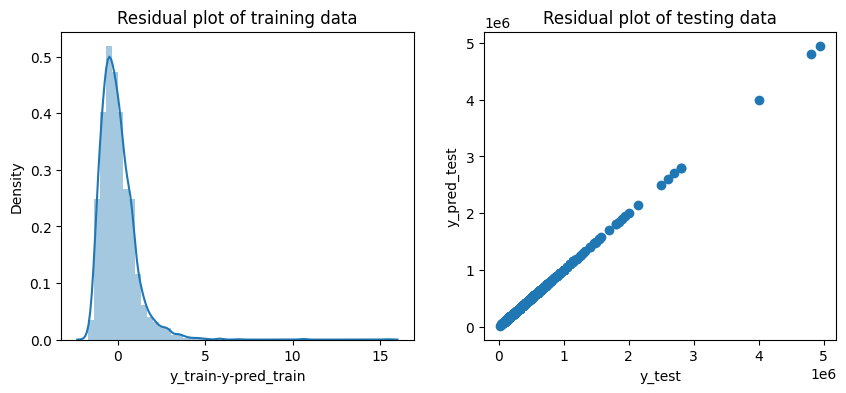

[1.0,
 1.0,
 np.float64(1.0),
 0.0,
 0.0,
 0.0,
 0.0,
 0.9999999999971279,
 0.999999999995806,
 np.float64(1.0),
 0.72,
 0.7,
 1.02,
 0.95]

In [72]:
# lasso regression
from sklearn.linear_model import Lasso
ls = Lasso()
alpha = np.logspace(-3,3, num =14)
ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha = alpha))
car_price_pred_model(ls_rs,"lasso.pkl")

c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

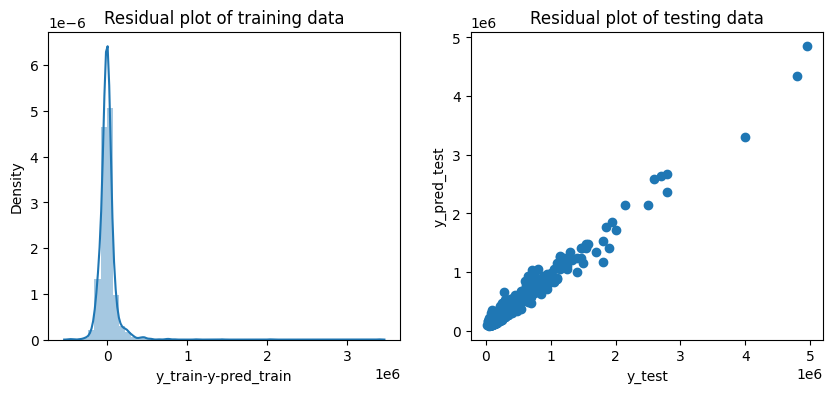

[1.0,
 1.0,
 np.float64(1.0),
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 np.float64(1.0),
 0.0,
 0.0,
 0.0,
 0.0,
 0.9999999999971279,
 0.999999999995806,
 np.float64(1.0),
 0.72,
 0.7,
 1.02,
 0.95,
 0.9608334478737409,
 0.9579829134558404,
 np.float64(0.87),
 62256.4,
 62966.62,
 13850234486.92,
 9499374418.38]

In [60]:
#Random Forest regression technnique
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

n_estimators = list(range(500,1000,100))
max_depth = list(range(4,9,4))
min_samples_split = list(range(4,9,2))
min_samples_leaf = [1,2,5,7]
max_features = ['auto','sqrt']
param_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}
rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_price_pred_model(rf_rs, "random_forest.pkl")





In [61]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=4,
                      n_estimators=600)


c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lasya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

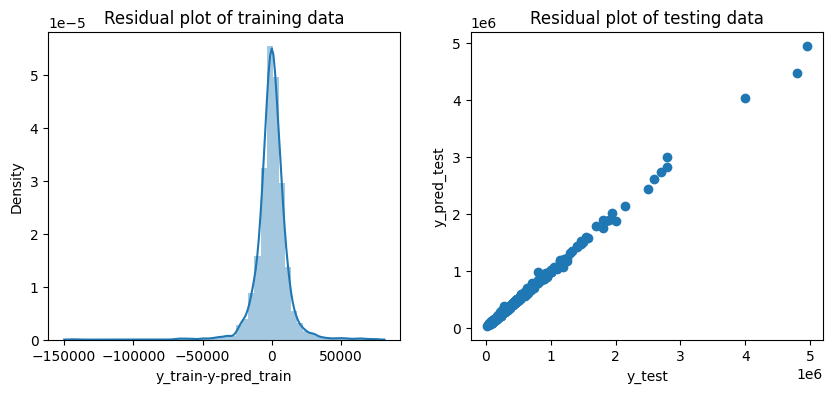

[1.0,
 1.0,
 np.float64(1.0),
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 np.float64(1.0),
 0.0,
 0.0,
 0.0,
 0.0,
 0.9999999999971279,
 0.999999999995806,
 np.float64(1.0),
 0.72,
 0.7,
 1.02,
 0.95,
 0.9608334478737409,
 0.9579829134558404,
 np.float64(0.87),
 62256.4,
 62966.62,
 13850234486.92,
 9499374418.38,
 0.9996386629183395,
 0.997405648913939,
 np.float64(0.98),
 7266.57,
 11979.94,
 127777479.46,
 586540247.46]

In [62]:
#Gradient boosting technique
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
gb = GradientBoostingRegressor()

learning_rate = [0.001,0.01,0.1,0.2]
n_estimators = list(range(500,1000,100))
max_depth = list(range(4,9,4))
min_samples_split = list(range(4,9,2))
min_samples_leaf = [1,2,5,7]
max_features = ['auto','sqrt']
param_grid = {
    'learning_rate':learning_rate,
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features

}
gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_price_pred_model(gb_rs,"gradient_boosting.pkl")